In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('CovidDataTime2.csv')

In [5]:
data = data.dropna()

In [6]:
data.describe()

,id,Age,Gender.1.Male.,HouseholdIncome,Education,PoliticalOrientation,own health,health of your loved ones,lockdown i,income/savings,...,I feel upset.,I am relaxed.,I am content.,I am worried.,STAI,STAI_scored,Anxiety_factor_STAI,Ethnicity,Dependents,HealthCareInsuranceSatisfaction
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,46.300000,1.518571,4.654286,2.488571,1.318571,56.341429,73.920000,45.444286,58.212857,...,1.700000,2.518571,2.374286,2.278571,44.566667,40.944444,48.673413,4.354286,1.702857,2.760000
std,202.21688,15.216558,0.500012,2.268884,1.137794,0.466256,29.898431,27.655026,30.940499,32.903015,...,0.897461,0.979590,0.976063,0.985357,15.835332,26.392221,19.377975,1.407184,0.457327,0.915359
min,1.00000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.125000,0.000000,1.000000,1.000000
25%,175.75000,33.000000,1.000000,3.000000,1.000000,1.000000,29.000000,61.000000,17.000000,28.750000,...,1.000000,2.000000,2.000000,2.000000,33.333333,22.222222,35.729167,5.000000,1.000000,2.000000
50%,350.50000,48.000000,2.000000,4.000000,3.000000,1.000000,63.000000,82.000000,49.500000,65.000000,...,1.000000,3.000000,2.000000,2.000000,43.333333,38.888889,51.097222,5.000000,2.000000,3.000000
75%,525.25000,59.000000,2.000000,7.000000,3.000000,2.000000,79.000000,98.000000,71.000000,87.000000,...,2.000000,3.000000,3.000000,3.000000,56.666667,61.111111,62.333333,5.000000,2.000000,3.000000
max,700.00000,83.000000,2.000000,8.000000,4.000000,2.000000,100.000000,100.000000,100.000000,100.000000,...,4.000000,4.000000,4.000000,4.000000,80.000000,100.000000,100.000000,5.000000,2.000000,4.000000


In [7]:
data = data[['Age', 'Gender.1.Male', 'HouseholdIncome', 'Education', 'PoliticalOrientation', 'COVID19Consumption', 'AnxietyLockdown', 'Dependents', 'HealthCareInsuranceSatisfaction']]
data.head()

KeyError: "['Gender.1.Male', 'AnxietyLockdown'] not in index"

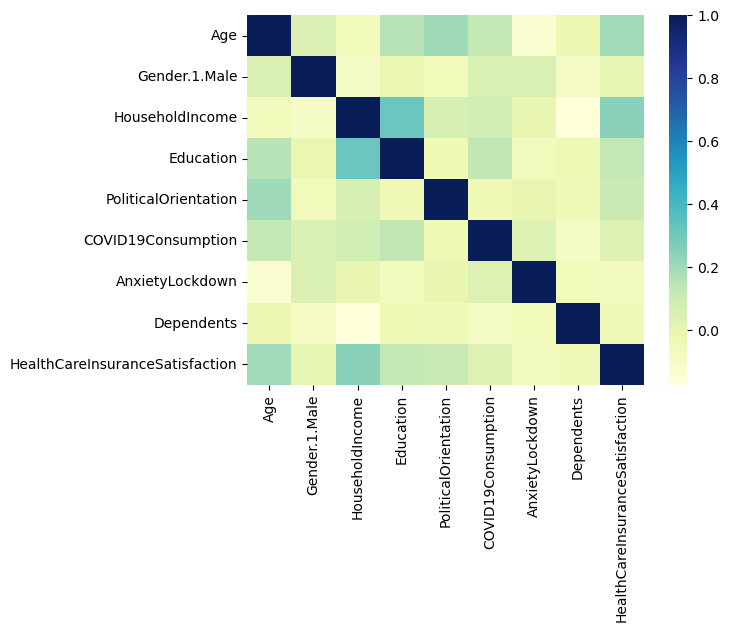

In [ ]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [ ]:
X=data
Y=data["COVID19Consumption"]
X.drop("COVID19Consumption", axis=1, inplace=True)

In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,10.897985,HealthCareInsuranceSatisfaction
0,10.199240,Age
6,9.735354,Dependents
4,8.712124,PoliticalOrientation
1,8.329849,Gender.1.Male
3,6.508219,Education
2,6.258664,HouseholdIncome
5,3.438512,AnxietyLockdown


In [ ]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Age length of unique values: 62
Gender.1.Male length of unique values: 2
HouseholdIncome length of unique values: 8
Education length of unique values: 4
PoliticalOrientation length of unique values: 2
AnxietyLockdown length of unique values: 101
Dependents length of unique values: 2
HealthCareInsuranceSatisfaction length of unique values: 4


In [ ]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

COVID-related information-seeking = β0 + β1* Anxiety Index Score + β2*Age + β3*Gender + β4*Educational level + β5*Income + β6*Political orientation + β7*Ethnicity + β8* Whether they had dependents + β9* satisfaction with their health insurance 

In [ ]:
x = sm.add_constant(X)
multi_model1 = sm.OLS(Y, x).fit()
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:     COVID19Consumption   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.706
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.36e-08
Time:                        11:30:57   Log-Likelihood:                -1134.6
No. Observations:                1065   AIC:                             2287.
Df Residuals:                    1056   BIC:                             2332.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

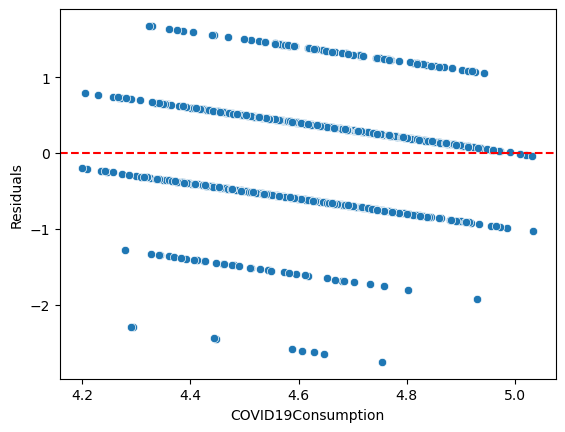

In [ ]:
sns.scatterplot(x=multi_model1.fittedvalues, y=multi_model1.resid)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add axis labels
plt.xlabel('COVID19Consumption')
plt.ylabel('Residuals')

# Show the plot
plt.show()

If the plot shows a random scatter of points with no discernible pattern, then the residuals are homoscedastic and have constant variance across the range of fitted values. This is a desirable property of a regression model, as it suggests that the model's assumptions are met and the results are reliable. 

In [ ]:
white_test = het_white(multi_model1.resid,  multi_model1.model.exog)
labels = ["Test Statistic", "Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, white_test)))

{'Test Statistic': 61.13638075372362, 'Test p-value': 0.022269637568458935, 'F-Statistic': 1.5195562695185865, 'F-Test p-value': 0.020179915394557015}


Heteroscedasticity refers to the unequal scatter of residuals at different levels of a response variable, which violates the assumption that the residuals are equally scattered at each level of the response variable.

Null (H0): Homoscedasticity is present (residuals are equally scattered)

Alternative (HA): Heteroscedasticity is not present (residuals are not equally scattered)

P-value is less than 0.5, which means residuals are equally scattered.

**Q-Q Plot**

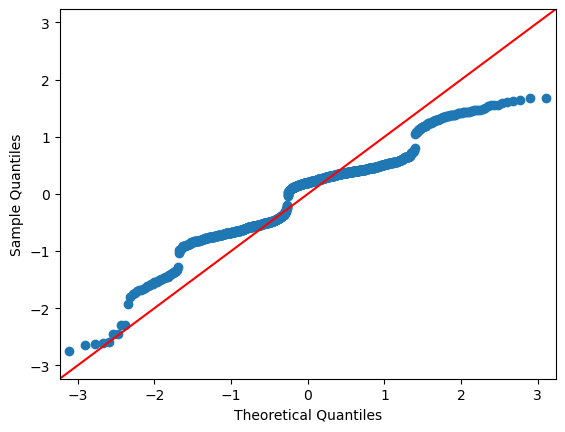

In [ ]:
fig = sm.qqplot(multi_model1.resid, line='45')
plt.show()

In [ ]:
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:     COVID19Consumption   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.706
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.36e-08
Time:                        11:31:04   Log-Likelihood:                -1134.6
No. Observations:                1065   AIC:                             2287.
Df Residuals:                    1056   BIC:                             2332.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     